In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import one_to_three

warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

In [2]:
# plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])
# def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation):
#     # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
#     # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
#     gamma = iteration_gamma
#     gamma = -gamma  # caused by tradition.
#     # convert gamma to gamma used by simulation
#     with open(gamma_for_simulation, "w") as out:
#         c = 0
#         for i in range(20):
#             for j in range(i, 20):
#                 out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
#                 c += 1
#         out.write("\n")
#         for i in range(20):
#             for j in range(i, 20):
#                 # protein, water
#                 out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
#                 c += 1

res_type_map = {
    'A': 0,
    'C': 4,
    'D': 3,
    'E': 6,
    'F': 13,
    'G': 7,
    'H': 8,
    'I': 9,
    'K': 11,
    'L': 10,
    'M': 12,
    'N': 2,
    'P': 14,
    'Q': 5,
    'R': 1,
    'S': 15,
    'T': 16,
    'V': 19,
    'W': 17,
    'Y': 18
}
# res_type_map = gamma_se_map_1_letter = {   'A': 0,  'R': 1,  'N': 2,  'D': 3,  'C': 4,
#                             'Q': 5,  'E': 6,  'G': 7,  'H': 8,  'I': 9,
#                             'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14,
#                             'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
res_type_map_letters = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G',
                        'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

inverse_res_type_map = dict(list(zip(list(range(20)), res_type_map_letters)))

def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation, burial_gamma_for_simulation=None):
    # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
    # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
    gamma = iteration_gamma
    gamma = -gamma  # caused by tradition.
    # convert gamma to gamma used by simulation
    with open(gamma_for_simulation, "w") as out:
        c = 0
        for i in range(20):
            for j in range(i, 20):
                out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
                c += 1
        out.write("\n")
        for i in range(20):
            for j in range(i, 20):
                # protein, water
                out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
                c += 1
    if burial_gamma_for_simulation:
        rhoGamma = pd.DataFrame(gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
        rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
        rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
        rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
        g = rhoGamma[["rho1", "rho2", "rho3"]].values
        np.savetxt(burial_gamma_for_simulation, g, fmt='%7.4f')





In [74]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
# pre = "/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1/gammas/"
# pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/gammas/"
# pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter3/gammas/"
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter4/gammas/"
# pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter2_improved/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)








In [83]:
total_phis = 690
num_decoys = 2000
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, mode=2)


417


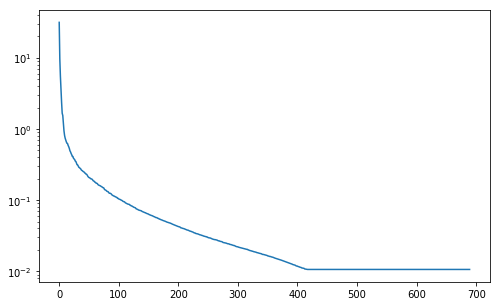

In [85]:
plt.plot(filtered_lamb)
plt.yscale('log')

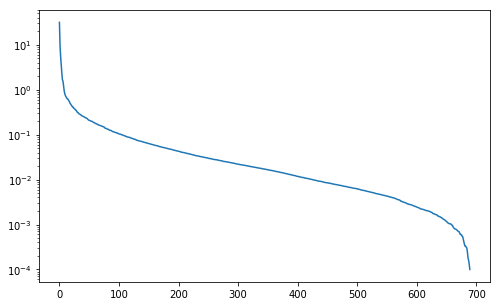

In [78]:
plt.plot(Lamb)
plt.yscale('log')

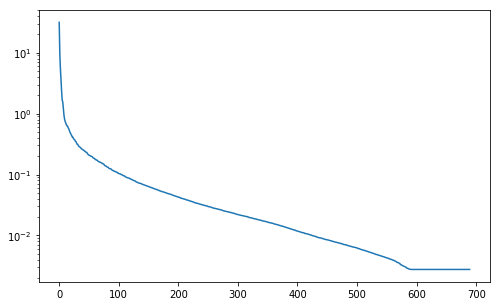

In [77]:
plt.plot(Lamb_filtered)
plt.yscale('log')

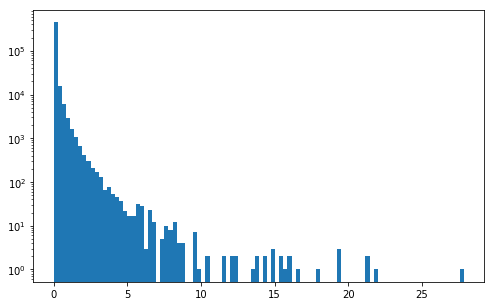

In [73]:
a = plt.hist(std_half_B.flatten(), bins=100)
plt.yscale('log')

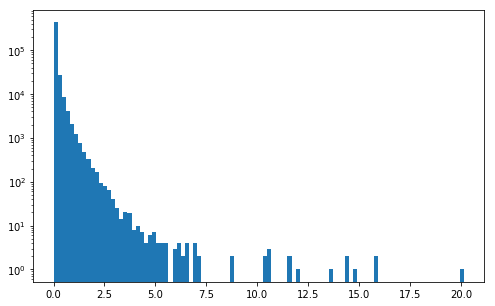

In [71]:
a = plt.hist(std_half_B.flatten(), bins=100)
plt.yscale('log')

In [31]:
g1 = Gamma_filtered

In [126]:
np.mean(Gamma_filtered2)

(-0.18649356521739133+0j)

In [127]:
np.std(Gamma_filtered2)

0.6358350958075707

In [128]:
np.std(Gamma_filtered)

7.643302673563186

In [47]:
iter3_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter3/iter3")

In [58]:
iter4_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter4/iter4")

In [48]:
iter3_gamma.shape

(690,)

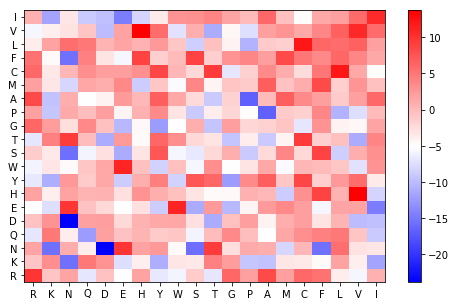

In [84]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

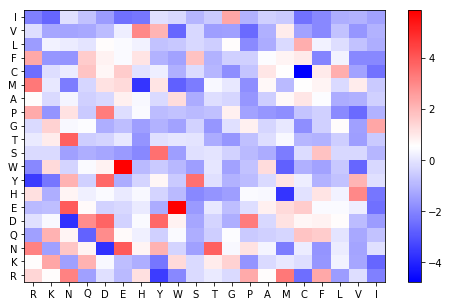

In [59]:
plot_contact_well(iter4_gamma[:210], inferBound=True, invert_sign=False)

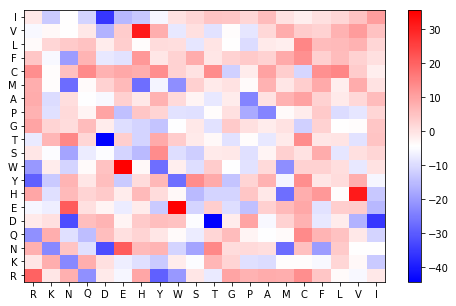

In [55]:
plot_contact_well(Gamma_filtered[:210], inferBound=True, invert_sign=False)

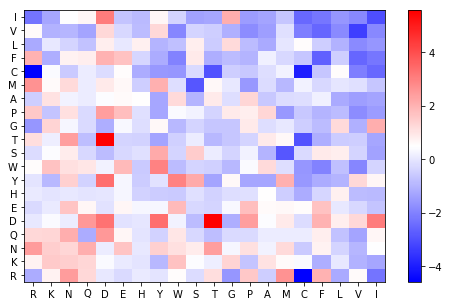

In [49]:
plot_contact_well(iter3_gamma[:210], inferBound=True, invert_sign=False)

In [43]:
iter2_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/iter1_gamma.dat")

In [44]:
def mix_gammas_2(pre, Gamma, preGamma, alpha=None, iterGammaName=None):
    if alpha is None:
        alpha = np.std(preGamma)/np.std(Gamma)
    percent = int(alpha*100)
    iter_gamma = (alpha/ (1.0 + alpha) * Gamma + 1.0/(1 + alpha) * preGamma).astype(float)
#     pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/"
    gamma_for_simulation = pre + f"iteration_gamma_{percent}.dat"
    burial_gamma_for_simulation = pre + f"iteration_burial_gamma_{percent}.dat"
    gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)
    if iterGammaName is not None:
        np.savetxt(pre+iterGammaName, iter_gamma)


In [108]:
def mix_gammas_3(pre, Gamma, preGamma, alpha=None, iterGammaName=None, iteration="5"):
    percent = int(alpha*100)
    scale = np.std(preGamma)/np.std(Gamma)
    iter_gamma = ((1- alpha)*preGamma + alpha*(scale*Gamma)).astype(float)
    iter_gamma *=  np.std(preGamma)/np.std(iter_gamma)

#     pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/"
    gamma_for_simulation = pre + f"iteration_{iteration}_gamma_{percent}.dat"
    burial_gamma_for_simulation = pre + f"iteration_{iteration}_burial_gamma_{percent}.dat"
    gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)
    if iterGammaName is not None:
        np.savetxt(pre+iterGammaName, iter_gamma)

In [29]:
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter2/"
mix_gammas_2(pre, Gamma_filtered, iter1, iterGammaName="iter2")

In [45]:
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter3/"
mix_gammas_2(pre, Gamma_filtered, iter2_gamma, iterGammaName="iter3")

In [57]:
iter3_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter3/iter3")
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter4/"
mix_gammas_2(pre, Gamma_filtered, iter3_gamma, iterGammaName="iter4")

In [86]:
iter3_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter3/iter3")
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter4/"
mix_gammas_2(pre, filtered_gamma, iter3_gamma, iterGammaName="iter4_2")

In [88]:
iter3_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter3/iter3")
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter4/"
mix_gammas_2(pre, Gamma_filtered, iter3_gamma, iterGammaName="iter4_4", alpha=0.06)

In [106]:
iter3_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter3/iter3")
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter4/"
mix_gammas_3(pre, Gamma_filtered, iter3_gamma, iterGammaName="iter4_thrid_gen", alpha=0.3)

In [109]:
iter4_gamma = np.loadtxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter4/iter4_thrid_gen")
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter5/"
mix_gammas_3(pre, Gamma_filtered, iter4_gamma, iterGammaName="iter5_thrid_gen", alpha=0.3, iteration=5)

In [110]:
pre_i = 5
pre_iter_gamma = np.loadtxt(f"/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter{pre_i}/iter{pre_i}_thrid_gen")
pre = f"/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter{pre_i+1}/"
mix_gammas_3(pre, Gamma_filtered, pre_iter_gamma, iterGammaName=f"iter{pre_i+1}_thrid_gen", alpha=0.3, iteration=pre_i+1)



In [111]:
pre_i = 6
pre_iter_gamma = np.loadtxt(f"/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter{pre_i}/iter{pre_i}_thrid_gen")
pre = f"/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter{pre_i+1}/"
mix_gammas_3(pre, Gamma_filtered, pre_iter_gamma, iterGammaName=f"iter{pre_i+1}_thrid_gen", alpha=0.3, iteration=pre_i+1)



In [21]:
alpha = np.std(Gamma_filtered2)/np.std(Gamma_filtered)

In [89]:
preGamma = iter3_gamma
Gamma = Gamma_filtered
alpha = None
if alpha is None:
    alpha = np.std(preGamma)/np.std(Gamma)
percent = int(alpha*100)
iter_gamma = (alpha/ (1.0 + alpha) * Gamma + 1.0/(1 + alpha) * preGamma).astype(float)
#     pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/"
    

In [90]:
np.std(iter_gamma)

1.3567577086476883

In [91]:
np.std(preGamma)

1.1584179955828737

In [92]:
np.std(Gamma)

8.584457410907518

In [93]:
alpha

0.13494364758697194

In [101]:
alpha = 0.05
scale = np.std(preGamma)/np.std(Gamma)
iter_gamma = (1- alpha)*preGamma + alpha*(scale*Gamma)
iter_gamma *=  np.std(preGamma)/np.std(iter_gamma)

In [102]:
np.std(iter_gamma)

1.1584179955828737

In [103]:
np.std(scale*Gamma)

1.1584179955828737

In [104]:
np.std(preGamma)

1.1584179955828737

In [98]:
iter_gamma = (1- alpha)*preGamma + alpha*Gamma

In [99]:
iter_gamma *=  np.std(preGamma)/np.std(iter_gamma)

In [100]:
np.std(iter_gamma)

1.1584179955828737

In [ ]:
np.std()

In [22]:
alpha

0.08318852765137907

In [23]:
np.std(iter1)/np.std(Gamma_filtered)

0.1056363210663856

In [25]:
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter2/"

mix_gammas_2(pre, Gamma_filtered, iter1, alpha)

In [15]:
iter1 = 0.04*Gamma_filtered1 + 0.96*Gamma_filtered2

In [20]:
np.savetxt("/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/iter1_gamma.dat", iter1.astype(float))

In [9]:
alpha = np.std(Gamma_filtered2)/np.std(Gamma_filtered)

In [11]:
a = Gamma_filtered * (alpha)/(1 + alpha)

In [13]:
np.std(Gamma_filtered2/(1+alpha))

0.5870031666474704

In [144]:
alpha

0.08318852765137907

In [12]:
np.std(a)

0.5870031666474705

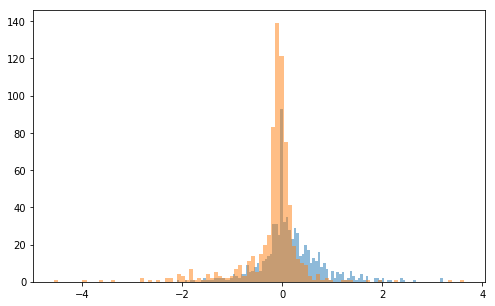

In [136]:
fig, ax1 = plt.subplots()
a = ax1.hist(a, bins=100, alpha=0.5)
b = ax1.hist(Gamma_filtered2, bins=100, alpha=0.5)

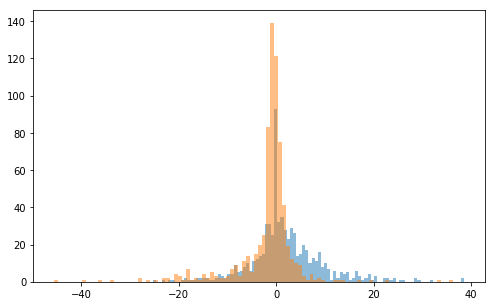

In [125]:
fig, ax1 = plt.subplots()
a = ax1.hist(Gamma_filtered, bins=100, alpha=0.5)
b = ax1.hist(Gamma_filtered2*10, bins=100, alpha=0.5)

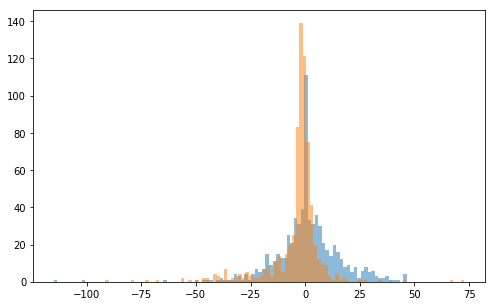

In [118]:
fig, ax1 = plt.subplots()
a = ax1.hist(Gamma_filtered, bins=100, alpha=0.5)
b = ax1.hist(Gamma_filtered2*20, bins=100, alpha=0.5)

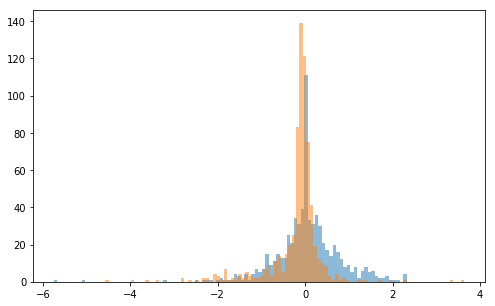

In [122]:
fig, ax1 = plt.subplots()
a = ax1.hist(Gamma_filtered/20, bins=100, alpha=0.5)
b = ax1.hist(Gamma_filtered2, bins=100, alpha=0.5)

In [119]:
1/21



0.047619047619047616

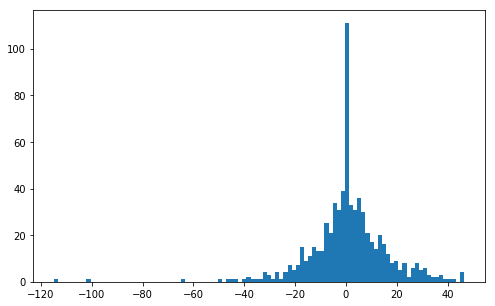

In [108]:
a = plt.hist(Gamma_filtered, bins=100)

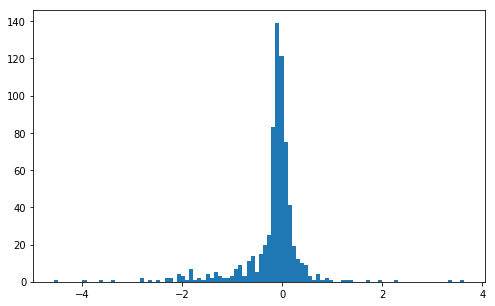

In [107]:
a = plt.hist(Gamma_filtered2, bins=100)

In [106]:
Gamma_filtered2.shape

(690,)

In [6]:
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/gammas/"
pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
def get_gammas(pre, pp):
    # pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
    # pre = "/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1/gammas/"
    # pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/gammas/"
    # pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
    # pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
    # pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
    A_name = pp + "_A"
    B_name = pp + "_B"
    B_filtered_name = pp + "_B_filtered"
    P_name = pp + "_P"
    Gamma_name = pp + "_gamma"
    Gamma_filtered_name = pp + "_gamma_filtered"
    Lamb_name = pp + "_lamb"
    Lamb_filtered_name = pp + "_lamb_filtered"

    A = np.loadtxt(pre+A_name)
    B = np.loadtxt(pre+B_name)
    B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Gamma = np.loadtxt(pre+Gamma_name)
    Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})

    half_B_name = pp + "_half_B"
    half_B = np.loadtxt(pre+half_B_name)
    other_half_B_name = pp + "_other_half_B"
    other_half_B = np.loadtxt(pre+other_half_B_name)
    std_half_B_name = pp + "_std_half_B"
    std_half_B = np.loadtxt(pre+std_half_B_name)
    return (A, B, B_filtered, Gamma, Gamma_filtered, Lamb, Lamb_filtered, half_B, other_half_B, std_half_B)







In [14]:
pre1 = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/gammas/"
pp1 = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

(A1, B1, B_filtered1, Gamma1, Gamma_filtered1, Lamb1, Lamb_filtered1, half_B1, other_half_B1, std_half_B1) = get_gammas(pre1, pp1)




In [7]:
pre2 = "/Volumes/Wei_backup/feb_2019/optimization/gammas/"
pp2 = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

(A2, B2, B_filtered2, Gamma2, Gamma_filtered2, Lamb2, Lamb_filtered2, half_B2, other_half_B2, std_half_B2) = get_gammas(pre2, pp2)




In [37]:
alpha = 0.04
A = alpha * A1 + (1 - alpha) * A2
B = alpha * B1 + (1 - alpha) * B2
B_filtered = alpha * B_filtered1 + (1 - alpha) * B_filtered2
half_B = alpha * half_B1 + (1 - alpha) * half_B2
other_half_B = alpha * other_half_B1 + (1 - alpha) * other_half_B2
std_half_B = alpha * std_half_B1 + (1 - alpha) * std_half_B2

In [39]:
total_phis = 690
num_decoys = 6000
filtered_gamma, filtered_B, filtered_lamb, P, lamb, noisy_lamb_list = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, mode=2)


min cutoff_mode 537


In [66]:
a.shape

(3, 2)

In [67]:
a[0].shape 

(2,)

In [75]:
np.average(np.ones((3,4,1)) * np.ones((3,1,1)), axis=0).shape

(4, 1)

In [72]:
np.zeros((4,4))[:, 2]

array([0., 0., 0., 0.])

In [81]:
np.average(np.ones((3,4,1)) * np.ones((3,1,1)), axis=0).T + (np.zeros((4,4))[2])

array([[1., 1., 1., 1.]])

In [83]:
a = np.zeros((4,4))

In [90]:
a[1] += np.average(np.ones((3,4,1)) * np.ones((3,1,1)), axis=0).reshape(4)

In [91]:
a

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [0., 0., 0., 0.]])

In [45]:
iter_gamma = filtered_gamma.astype(float)
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/"
gamma_for_simulation = pre + f"iteration_gamma_combined_on_B.dat"
burial_gamma_for_simulation = pre + f"iteration_burial_gamma_combined_on_B.dat"
gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)


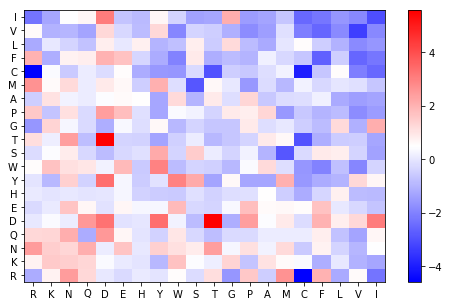

In [53]:

plot_contact_well(iter3_gamma[:210], inferBound=True, invert_sign=False, vmin=-3, vmax=1)

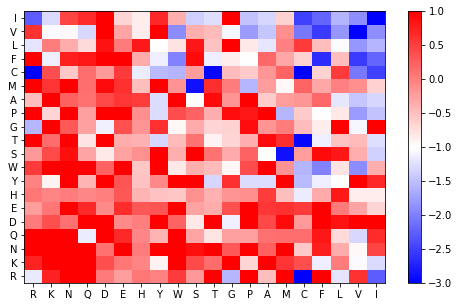

In [52]:

plot_contact_well(iter3_gamma[:210], inferBound=False, invert_sign=False, vmin=-3, vmax=1)

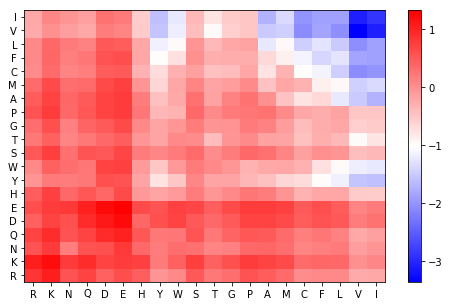

In [40]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

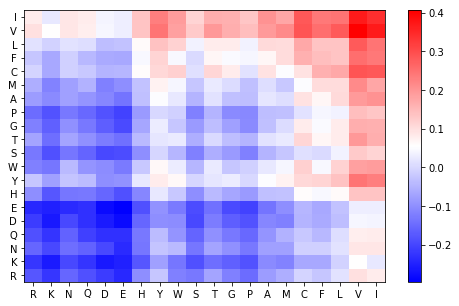

In [42]:
plot_contact_well(filtered_gamma[210:420], inferBound=True, invert_sign=False)

In [43]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].astype(float).reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,-0.389817,-0.275533,-0.007550,0,A
1,ARG,0.188232,-0.138396,-0.699963,1,R
2,ASN,0.133230,-0.156322,-0.655960,2,N
3,ASP,0.437539,-0.137543,-1.162275,3,D
4,CYS,-0.478401,-0.042398,0.489214,4,C
5,GLN,0.267881,-0.151885,-0.812216,5,Q
6,GLU,0.221105,-0.385161,-1.519386,6,E
7,GLY,-0.057521,-0.120650,-0.273680,7,G
8,HIS,0.080922,-0.006209,-0.161267,8,H
9,ILE,-1.201620,-0.266807,1.463629,9,I


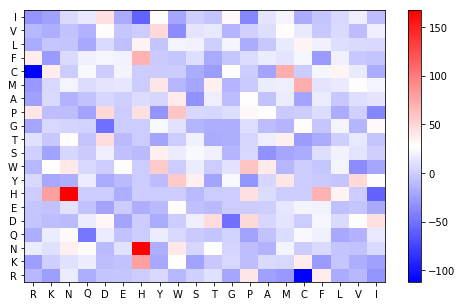

In [24]:
plot_contact_well(Gamma[:210], inferBound=True, invert_sign=False)

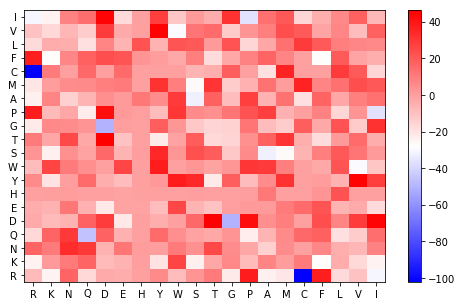

In [25]:
plot_contact_well(Gamma_filtered[:210], inferBound=True, invert_sign=False)

In [27]:

def get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, noise_iterations=10, relative_error_threshold=0.5, mode=2):
    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
    np.random.seed(10)
    cutoff_modes = []
    noisy_lamb_list = []
    for i_noise in range(noise_iterations):
        noisy_B = np.zeros((total_phis, total_phis))
        for i in range(total_phis):
            for j in range(i, total_phis):
#                 random_B_ij = np.random.normal(
#                     loc=half_B[i][j], scale=std_half_B[i][j])
                if mode == 1:
                    random_B_ij = np.random.normal(
                        loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
                elif mode == 2:
                    random_B_ij = np.random.normal(
                        loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys)**0.5)
                noisy_B[i][j] = noisy_B[j][i] = random_B_ij - \
                    other_half_B[i][j]

        noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
        noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
            noisy_lamb, noisy_P)
        noisy_lamb_list.append(noisy_lamb)
        try:
            cutoff_mode = np.where(
                np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
        except IndexError:
            cutoff_mode = len(lamb)
        cutoff_modes.append(cutoff_mode)

    cutoff_mode = min(cutoff_modes)
#     cutoff_mode = 10
    print("min cutoff_mode", cutoff_mode)

    filtered_lamb = np.copy(lamb)
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
        filtered_lamb, cutoff_mode, P)

    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)
    return filtered_gamma, filtered_B, filtered_lamb, P, lamb, noisy_lamb_list


def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors





In [10]:
total_phis = 690
num_decoys = 6000



In [11]:
import numpy as np
a = np.zeros((24000, 690, 2))
print("%d Mbytes" % (a.size * a.itemsize / 1024 / 1024))

252 Mbytes


In [12]:
126*690

86940

In [1]:
a = {"a":"out"}

In [2]:
a["a"]

'out'

In [22]:
pwd

'/Users/weilu/opt/notebook/Optimization'

In [38]:
len(burial_gamma)

20

In [41]:
for i in range(3):
    print(i)

0
1
2


In [59]:
# convert gamma to gamma used by optimization
def read_gamma(gammaFile):
    # attention, there is a minus sign. from strength to energy
    data = -np.loadtxt(gammaFile)
    gamma_direct = data[:210]
    gamma_mediated = data[210:]
    return gamma_direct, gamma_mediated
gamma_direct, gamma_mediated = read_gamma("/Users/weilu/Research/server/feb_2019/optimization_iter1/iteration_gamma.dat")
# attention, there is a minus sign. from strength to energy
burial_gamma = -np.loadtxt("/Users/weilu/Research/server/feb_2019/optimization_iter1/iteration_burial_gamma.dat")

with open("/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1/previous_iter1.dat", "w") as out:
    for x in gamma_direct:
        out.write(f"{x[0]}\n")
    for x in gamma_mediated:
        out.write(f"{x[0]}\n")   # protein
    for x in gamma_mediated:
        out.write(f"{x[1]}\n")
    for i in range(3):
        for j in range(len(burial_gamma)):
            out.write(f"{burial_gamma[j][i]}\n")
        

# # convert gamma to gamma used by optimization
# def read_gamma(gammaFile):
#     # attention, there is a minus sign. from strength to energy
#     data = -np.loadtxt(gammaFile)
#     gamma_direct = data[:210]
#     gamma_mediated = data[210:]
#     return gamma_direct, gamma_mediated
# gamma_direct, gamma_mediated = read_gamma("/Users/weilu/openmmawsem/parameters/gamma.dat")
# # attention, there is a minus sign. from strength to energy
# burial_gamma = -np.loadtxt("/Users/weilu/openmmawsem/parameters/burial_gamma.dat")

# with open("/Users/weilu/Research/server/feb_2019/original_gamma.dat", "w") as out:
#     for x in gamma_direct:
#         out.write(f"{x[0]}\n")
#     for x in gamma_mediated:
#         out.write(f"{x[0]}\n")   # protein
#     for x in gamma_mediated:
#         out.write(f"{x[1]}\n")
#     for i in range(3):
#         for j in range(len(burial_gamma)):
#             out.write(f"{burial_gamma[j][i]}\n")
        




In [ ]:
os.chdir("/Users/weilu/opt/notebook/Optimization")

In [7]:
Gamma[:10]

array([-0.36672,  0.08898, -0.00318,  0.33267, -1.4817 ,  0.13133,
        0.40348, -0.14097, -0.20817, -2.20075])

In [24]:
os.chdir("/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1")

In [17]:
os.chdir("/Volumes/Wei_backup/feb_2019/optimization_with_biased_iter1")

In [4]:
# pre = "/Users/weilu/Research/server/feb_2019/optimization/gammas/"
pre = "/Volumes/Wei_backup/feb_2019/optimization/gammas/"
pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
Gamma_name = pp + "_gamma"
Gamma = np.loadtxt(pre+Gamma_name)

# iter_gamma = (0.2 * Gamma_filtered + 0.8 * Gamma).astype(float)
# iter_gamma = (0.02 * Gamma_filtered + 0.98 * Gamma).astype(float)
iter_gamma = (0.1 * Gamma_filtered + 0.9 * Gamma).astype(float)
# iter_gamma = (0.04 * Gamma_filtered + 0.96 * Gamma).astype(float)
# np.savetxt("gamma_iter1_combined_mar06.dat", iter_gamma, fmt='%1.5f')




In [5]:
def mix_gammas(newGamma, preGamma, alpha):
    alpha = percent/100.0
    iter_gamma = ((1-alpha) * newGamma + alpha * preGamma).astype(float)
    pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/"
    gamma_for_simulation = pre + f"iteration_gamma_{percent}.dat"
    burial_gamma_for_simulation = pre + f"iteration_burial_gamma_{percent}.dat"
    gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)



In [6]:
percent = 98
mix_gammas(Gamma_filtered, Gamma, percent)

In [42]:
percent = 0
mix_gammas(Gamma_filtered, Gamma, percent)

In [40]:
percent = 96
mix_gammas(Gamma_filtered, Gamma, percent)

In [41]:
percent = 90
mix_gammas(Gamma_filtered, Gamma, percent)

In [33]:
percent = 0
iter_gamma = ((1-percent/100.0) * Gamma_filtered + percent/100.0 * Gamma).astype(float)
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/"
gamma_for_simulation = pre + f"iteration_gamma_{percent}.dat"
burial_gamma_for_simulation = pre + f"iteration_burial_gamma_{percent}.dat"
gamma_format_convertion_iteration_to_simulation(Gamma_filtered.astype(float), gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)



In [34]:
percent = 90
iter_gamma = ((1-percent/100.0) * Gamma_filtered + percent/100.0 * Gamma).astype(float)
pre = "/Users/weilu/Research/server/march_2019/optimization_weighted_by_q_iter1/"
gamma_for_simulation = pre + f"iteration_gamma_{percent}.dat"
burial_gamma_for_simulation = pre + f"iteration_burial_gamma_{percent}.dat"
gamma_format_convertion_iteration_to_simulation(Gamma_filtered.astype(float), gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)



In [18]:
gamma_file_name = "gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered"




In [27]:
gamma_file_name = "gamma_iter1_combined_mar06.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (12.239546896066248+0j)


([(12.239546896066248+0j),
  (14.776922708201267+0j),
  (17.75164633661523+0j),
  (12.462773481596363+0j),
  (5.136094464807733+0j),
  (10.747711563995965+0j)],
 [(-63.860538695285214+0j),
  (-76.24266638499954+0j),
  (-119.55259900544597+0j),
  (-116.48445543839254+0j),
  (-146.96711499751189+0j),
  (-126.89909551758436+0j)],
 [-12.957840527174318,
  -17.310136143575765,
  -24.950351149977184,
  -31.811973590371647,
  -53.36145746918327,
  -53.08642393601131],
 [4.158871124916468,
  3.9881463417762837,
  5.329209813083001,
  6.794032000425571,
  18.225065401290802,
  6.867757023629107])

In [22]:
gamma_file_name = "new_iter1_gamma.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (16.968723503856513+0j)


([(16.968723503856513+0j),
  (20.669477853914103+0j),
  (21.035334878869726+0j),
  (23.28253291562041+0j),
  (22.11055969801755+0j),
  (21.790532100096865+0j)],
 [(-449.40017899440664+0j),
  (-636.4029374871329+0j),
  (-850.861311494005+0j),
  (-922.2037799134266+0j),
  (-904.1641444710558+0j),
  (-944.1371760278114+0j)],
 [-43.8288415358845,
  -80.39629101516044,
  -116.06722852746827,
  -104.23413773685131,
  -108.09559940125413,
  -179.05046842567228],
 [23.90111061485251,
  26.89988834752706,
  34.931418358575655,
  35.13233053899363,
  36.003997906085466,
  35.11096948379421])

In [47]:
gamma_file_name = "gamma_iter1_origin_filter.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (30.714529557439594+0j)


([(30.714529557439594+0j),
  (32.2596375080873+0j),
  (41.17268101532918+0j),
  (52.74622374859968+0j),
  (31.006662254492987+0j),
  (53.903272533057866+0j)],
 [(-1140.2693087736973+0j),
  (-1362.9375049720065+0j),
  (-2061.7999237051677+0j),
  (-2592.4948772284374+0j),
  (-1345.724537216494+0j),
  (-2896.5324803938756+0j)],
 [-61.75527945912854,
  -177.37108540485085,
  -224.5478576052068,
  -311.6129361144566,
  -126.53479810777617,
  -454.29392110967007],
 [35.11413148287449,
  36.75076693809536,
  44.62308552158469,
  43.242563713853244,
  39.32025089001807,
  45.30779755137179])

In [49]:
gamma_file_name = "original_gamma.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (6.137732892901585+0j)


([(6.137732892901585+0j),
  (6.850980844577853+0j),
  (5.598781683212696+0j),
  (4.4568261613318+0j),
  (3.782575452121362+0j),
  (8.331355986401979+0j)],
 [(-54.2777009151823+0j),
  (-54.71865985227359+0j),
  (-63.91975454508282+0j),
  (-77.52020664539442+0j),
  (-96.96819009959036+0j),
  (-95.64260904230987+0j)],
 [-17.912388496863535,
  -19.224059856534637,
  -23.662128117061403,
  -32.29022149013295,
  -40.72548280048413,
  -41.2108654346743],
 [5.924876994952973,
  5.180951574814405,
  7.190426186598645,
  10.148474164795724,
  14.868892375316378,
  6.533359479114363])

In [52]:
gamma_file_name = "gamma_iter_0.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (3.5309735447521375+0j)


([(3.5309735447521375+0j),
  (2.202833247852408+0j),
  (6.081027011086596+0j),
  (0.9744284029297371+0j),
  (0.9682378414104372+0j),
  (0.1533592367528443+0j)],
 [(-24.62662335987055+0j),
  (-18.733926158092306+0j),
  (-43.21095859488472+0j),
  (-33.60854520088053+0j),
  (-68.33379517556816+0j),
  (-42.544748764215825+0j)],
 [-10.761018956197702,
  -12.00504920162656,
  -16.642129901642694,
  -26.431309784342215,
  -49.2649180920217,
  -41.53940004746229],
 [3.926850266063425,
  3.0546465389633464,
  4.369135122209323,
  7.365585193287761,
  19.694414190390162,
  6.555514607664426])

In [53]:

gamma_file_name = "gamma_iter1_new_filter.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (31.222582217023767+0j)


([(31.222582217023767+0j),
  (32.71032016599008+0j),
  (41.309659041914884+0j),
  (49.12532118469017+0j),
  (31.459048447265783+0j),
  (49.81515335021521+0j)],
 [(-1083.6317004178475+0j),
  (-1265.7704868180667+0j),
  (-1938.8123259223955+0j),
  (-2147.163542363728+0j),
  (-1306.5294630619642+0j),
  (-2410.822397621466+0j)],
 [-65.52619076370671,
  -167.91924377861608,
  -215.73476106689614,
  -250.02450006265573,
  -118.29308249154414,
  -378.7127725662777],
 [32.60798554640461,
  33.56284002933484,
  41.71125118963526,
  38.61835396798001,
  37.770893883273004,
  40.79300149432159])

In [58]:

gamma_file_name = "gamma_iter1_combined.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (29.577080499909464+0j)


([(29.577080499909464+0j),
  (30.43713173411673+0j),
  (39.68827387347712+0j),
  (40.264442954556756+0j),
  (14.683380705198132+0j),
  (41.22658626924627+0j)],
 [(-233.54459945977334+0j),
  (-264.3562833265989+0j),
  (-418.3994917843967+0j),
  (-451.0008458472786+0j),
  (-311.5731352365859+0j),
  (-511.0406142239666+0j)],
 [-20.72743141716814,
  -41.82431688552133,
  -55.00800392297417,
  -69.01696908842834,
  -61.482555740213925,
  -107.01498953667111],
 [7.195340596353201,
  7.31120029262295,
  9.156142416772369,
  9.486878464703082,
  17.03222061169035,
  9.800123203232227])

In [60]:
gamma_file_name = "previous_iter1.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (3.884499832967118+0j)


([(3.884499832967118+0j),
  (2.0848904534342556+0j),
  (0.8766641083569572+0j),
  (2.7125769308597136+0j),
  (2.3594748497199522+0j),
  (16.21623202107247+0j)],
 [(-56.5981268715542+0j),
  (-34.70721463370089+0j),
  (-8.71542865935356+0j),
  (-44.03562764870141+0j),
  (-53.43673692872248+0j),
  (-279.0015913785711+0j)],
 [-10.436928192882498,
  -1.7881864080661287,
  0.7367224493535263,
  -4.330739115434836,
  -9.337863868048354,
  75.03669767192545],
 [11.8834343322425,
  15.789332322669596,
  10.781952880929841,
  14.637331786450995,
  18.690122111667456,
  21.832339879599356])

In [77]:
# 98 percent
gamma_file_name = "gamma_iter1_combined.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (8.784370583629089+0j)


([(8.784370583629089+0j),
  (9.036932071694473+0j),
  (14.439269254832835+0j),
  (6.249860291834691+0j),
  (2.091950807148329+0j),
  (6.082889827478184+0j)],
 [(-42.274862048589746+0j),
  (-39.03794711982817+0j),
  (-76.3063764047046+0j),
  (-69.36405905973211+0j),
  (-87.70783496432327+0j),
  (-83.58936348676657+0j)],
 [-10.647675397878535,
  -13.452912915027094,
  -18.844427371165647,
  -28.29022626362761,
  -48.70009681922621,
  -45.88286804187431],
 [3.600393033241667,
  2.831163718153715,
  3.979560739495621,
  6.571960152415982,
  18.646584810601254,
  6.198779940836845])

In [73]:
# 96 percent
gamma_file_name = "gamma_iter1_combined.dat"

validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

0 (13.907760508357239+0j)


([(13.907760508357239+0j),
  (15.393534564143144+0j),
  (21.636275990984416+0j),
  (11.967898631604573+0j),
  (3.409519300454499+0j),
  (12.480141382633581+0j)],
 [(-63.52707192745018+0j),
  (-64.07337423585366+0j),
  (-114.3168575812048+0j),
  (-111.76827963987833+0j),
  (-112.58187766325719+0j),
  (-131.08400906664485+0j)],
 [-11.767642190993723,
  -16.60530152180621,
  -22.86264570475794,
  -32.81543576265521,
  -50.12042872618632,
  -52.67534072311038],
 [3.72162216234267,
  3.0836369981340725,
  4.226892461279139,
  6.597051521536631,
  18.319722938287686,
  6.282674686093062])

In [76]:
np.savetxt("gamma_iter1_combined.dat", iter_gamma, fmt='%1.5f')

In [78]:
pre = "/Users/weilu/Research/server/feb_2019/optimization/gammas/"
pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
Gamma_name = pp + "_gamma"
Gamma = np.loadtxt(pre+Gamma_name)

# iter_gamma = (0.2 * Gamma_filtered + 0.8 * Gamma).astype(float)
iter_gamma = (0.02 * Gamma_filtered + 0.98 * Gamma).astype(float)
# iter_gamma = (0.04 * Gamma_filtered + 0.96 * Gamma).astype(float)

In [79]:
gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1/iteration_gamma.dat"
burial_gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1/iteration_burial_gamma.dat"
gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)







In [26]:
z_score, e_native, e_mg, e_mg_std = evaluate_hamiltonian_wei("1fc2", "phi_list.txt", "proteins_name_list.txt", None, "lammps", 6000)



In [27]:
z_score

(30.714529557439594+0j)

In [28]:
e_native

(-1140.2693087736973+0j)

In [29]:
e_mg

-61.75527945912854

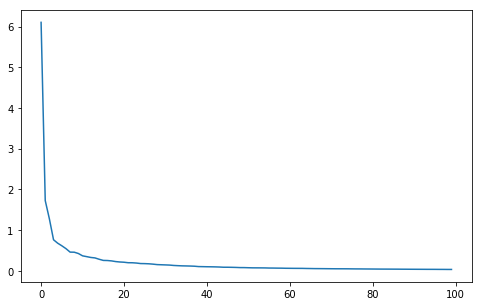

In [17]:
plt.plot(lamb[:100])

In [21]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb, noisy_lamb_list = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, mode=2)


min cutoff_mode 438


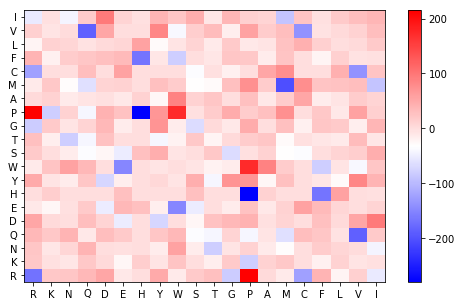

In [19]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

In [15]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].astype(float).reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,22.518473,6.620584,9.804887,0,A
1,ARG,-1.798650,-8.524360,-29.553309,1,R
2,ASN,35.513946,29.654402,48.752308,2,N
3,ASP,12.062799,2.152616,-3.101808,3,D
4,CYS,17.075106,-29.282504,-1.426390,4,C
5,GLN,17.808241,8.374423,24.835739,5,Q
6,GLU,-25.754676,-32.066855,-30.804984,6,E
7,GLY,-14.706492,-19.196433,-10.703004,7,G
8,HIS,17.516138,5.185796,0.000000,8,H
9,ILE,5.609815,-9.382641,-31.003939,9,I


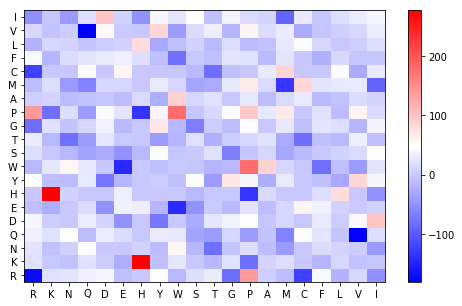

In [4]:
plot_contact_well(Gamma_filtered[:210], inferBound=True, invert_sign=False)

In [7]:
rhoGamma = pd.DataFrame(Gamma_filtered[630:].astype(float).reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,21.02257,5.68986,8.23508,0,A
1,ARG,-4.84993,-9.26003,-29.57624,1,R
2,ASN,20.14410,15.41603,48.10337,2,N
3,ASP,-2.03852,-13.83016,-24.61289,3,D
4,CYS,-322.87792,-380.41756,-408.04365,4,C
5,GLN,31.45585,21.87162,40.27171,5,Q
6,GLU,-30.77187,-36.79035,-35.34688,6,E
7,GLY,-19.70777,-25.18152,-25.75290,7,G
8,HIS,167.00113,175.83247,22.98043,8,H
9,ILE,14.46157,0.08975,-26.50159,9,I
